# UNAD

## Amaury Garcia Osorio

### Predicción de presencia de enfermedad cardíaca por regresión Logística

### Seleccionar uno de los modelos de Aprendizaje Supervisado vistos en la Tarea 3 (Regresión Lineal, Regresión Logística o Árboles de decisión).
#### Diseñar los modelos predictivos de Regresión Logística. Para el algoritmo realizar los siguientes pasos:
1.	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2.	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5.	Entrenar el modelo configurando los diferentes hiperparámetros.
6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8.	Interpretar, analizar y documentar los resultados obtenidos.
Cargar en GitHub el código del modelo diseñado https://github.com/


## 1.	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [122]:
# cargar las librerias necesarias

import pandas as pd # Manejo de análisis y estructura de Datos
import numpy as np # Cálculo Númerico y el análisis de Datos
import seaborn as sns # Creación Gráficos Estadísticos
import matplotlib.pyplot as plt # Creación de Gráficas en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [124]:
# lectura de datos en python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [126]:
#Realizar lectura de los Datos para el análisis exploratorio

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [128]:
# Descripción de los datos

Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
# Comprobar valores nulos o faltantes
Datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

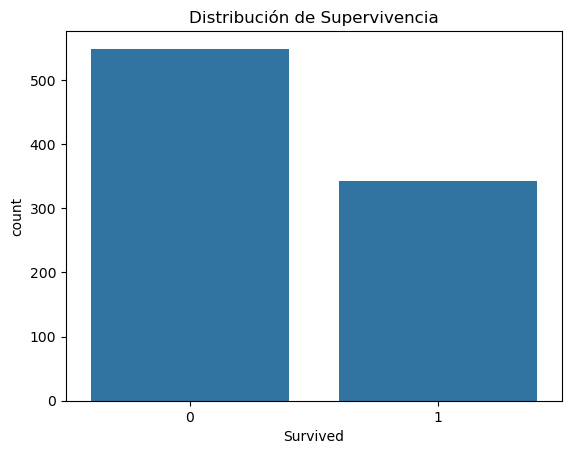

In [132]:
# Visualización inicial de Distribucion de Supervivencia
sns.countplot(data=Datos, x="Survived")
plt.title("Distribución de Supervivencia")
plt.show()

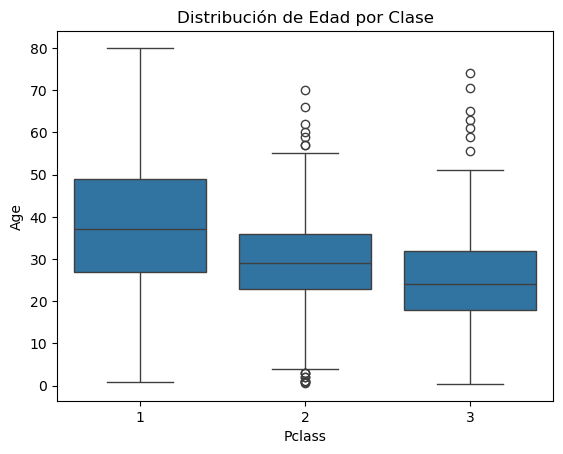

In [134]:
# Distribucion de edad por clase
sns.boxplot(data=Datos, x="Pclass", y="Age")
plt.title("Distribución de Edad por Clase")
plt.show()

## 2.	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [137]:
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes
titanic_Datos_cleaned = Datos.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])


In [139]:
# Rellenar valores faltantes
titanic_Datos_cleaned["Age"] = titanic_Datos_cleaned["Age"].fillna(titanic_Datos_cleaned["Age"].median())
titanic_Datos_cleaned["Embarked"] = titanic_Datos_cleaned["Embarked"].fillna(titanic_Datos_cleaned["Embarked"].mode()[0])

In [141]:
# Convertir variables categóricas a numéricas
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    titanic_Datos_cleaned[col] = le.fit_transform(titanic_Datos_cleaned[col])
    label_encoders[col] = le

In [143]:
# Verificar los datos preprocesados
titanic_Datos_cleaned.info(), titanic_Datos_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


(None,
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         0       3    1  22.0      1      0   7.2500         2
 1         1       1    0  38.0      1      0  71.2833         0
 2         1       3    0  26.0      0      0   7.9250         2
 3         1       1    0  35.0      1      0  53.1000         2
 4         0       3    1  35.0      0      0   8.0500         2)

In [145]:
titanic_Datos_cleaned.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [147]:
# Comprobamos nuevamente valores nulos o faltantes
titanic_Datos_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [151]:
from sklearn.ensemble import RandomForestClassifier

# Separar las características y la variable objetivo
X = titanic_Datos_cleaned.drop("Survived", axis=1)
y = titanic_Datos_cleaned["Survived"]

# Selección de características utilizando un modelo base (Random Forest)
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(X, y)

# Importancia de características
feature_importances = pd.Series(feature_selector.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar las características más importantes
feature_importances

Fare        0.274307
Sex         0.262157
Age         0.257884
Pclass      0.088450
SibSp       0.045523
Parch       0.038107
Embarked    0.033572
dtype: float64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [189]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_selected = X[["Fare", "Sex", "Age", "Pclass"]]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)


In [191]:
print (X_train)

         Fare  Sex    Age  Pclass
298   30.5000    1  28.00       1
884    7.0500    1  25.00       3
247   14.5000    0  24.00       2
478    7.5208    1  22.00       3
305  151.5500    1   0.92       1
..        ...  ...    ...     ...
106    7.6500    0  21.00       3
270   31.0000    1  28.00       1
860   14.1083    1  41.00       3
435  120.0000    0  14.00       1
102   77.2875    1  21.00       1

[668 rows x 4 columns]


In [193]:
print (y_train)

298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64


## 5.	Entrenar el modelo configurando los diferentes hiperparámetros.

In [195]:
# Entrenar un modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

In [199]:
print (y_test)

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64


In [203]:
print (y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1
 0]


## 6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [212]:
# Evaluar el modelo
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar los resultados
print("Classification Report:\n", classification_rep)
print("Accuracy Score:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       134
           1       0.74      0.72      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

Accuracy Score: 0.7847533632286996


## 7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

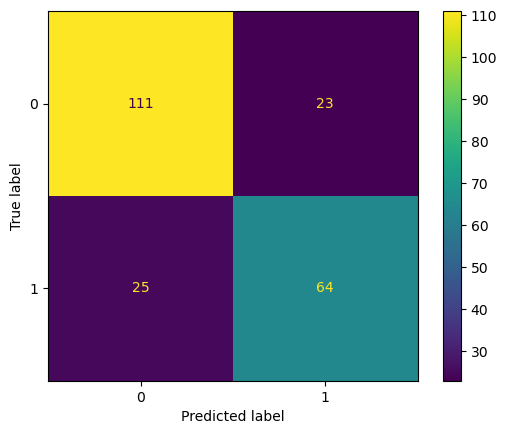

In [216]:
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

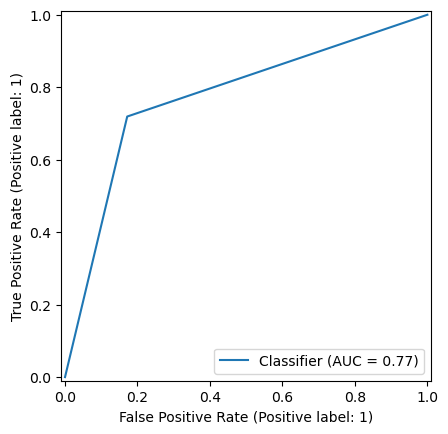

In [218]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

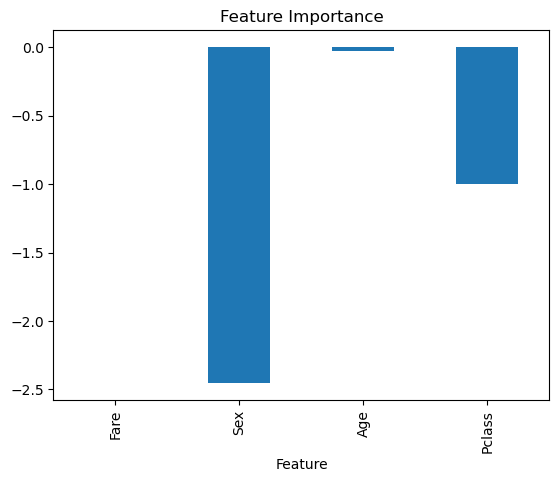

In [226]:
# Coeficientes del modelo
coefficients.plot(x="Feature", y="Coefficient", kind="bar", legend=False, title="Feature Importance")
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "sobreviviente" es 0,74, lo que significa que el 74% de los pasajeros predichos como sobrevivientes por el modelo eran en realidad sobrevivientes.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí, el Recall para la clase "sobreviviente" es 0.72, lo que indica que el modelo identificó correctamente al 72% de todos los sobrevivientes.

- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí, la puntuación F1 Score para la clase "sobreviviente" es 0.73, lo que indica un equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: El número de observaciones que el clasificador predijo correctamente como "no sobreviviente" es 111.

- Verdaderos positivos: El número de observaciones que el clasificador predijo correctamente como "sobreviviente" es 64.

- Falsos positivos: El número de observaciones que el clasificador predijo incorrectamente como "sobreviviente" es 23.

- Falsos negativos: El número de observaciones que el clasificador predijo incorrectamente como "no sobreviviente" es 25.

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,77 lo que significa que el 77 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

Características clave:

- Las variables como Sex, Fare, Age, y Pclass fueron determinantes en el desempeño del modelo.

Coeficientes del modelo

- El género (Sex) tuvo un impacto significativo en la predicción, donde ser mujer incrementa las probabilidades de supervivencia.